In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import copy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('C:/Users/Yogendra/Downloads/Zoo.csv')
df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
df.shape

(101, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
#converting type to category from int

In [6]:
df['type']=df['type'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   animal name  101 non-null    object  
 1   hair         101 non-null    int64   
 2   feathers     101 non-null    int64   
 3   eggs         101 non-null    int64   
 4   milk         101 non-null    int64   
 5   airborne     101 non-null    int64   
 6   aquatic      101 non-null    int64   
 7   predator     101 non-null    int64   
 8   toothed      101 non-null    int64   
 9   backbone     101 non-null    int64   
 10  breathes     101 non-null    int64   
 11  venomous     101 non-null    int64   
 12  fins         101 non-null    int64   
 13  legs         101 non-null    int64   
 14  tail         101 non-null    int64   
 15  domestic     101 non-null    int64   
 16  catsize      101 non-null    int64   
 17  type         101 non-null    category
dtypes: category(1), int64(16), obj

In [7]:
df.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [8]:
#No null values

In [9]:
#Searching and dropping duplicates

In [10]:
df.duplicated().sum()

0

In [11]:
df.duplicated().sum()

0

In [12]:
#some number crunching

In [13]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000


In [14]:
df.corr()

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_4268\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125


C:\Users\Yogendra\AppData\Local\Temp\ipykernel_4268\288865136.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap="crest")


<Axes: >

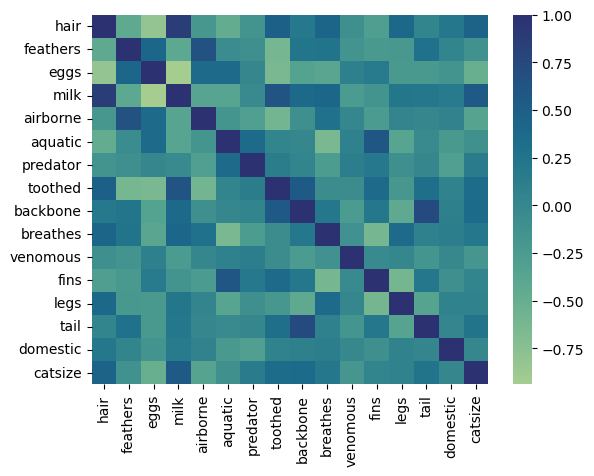

In [15]:
sns.heatmap(df.corr(),cmap="crest")

In [16]:
df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [17]:
features = ['hair', 'feathers', 'eggs', 'milk', 'airborne','aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous','fins', 'legs', 'tail', 'domestic', 'catsize', 'type']

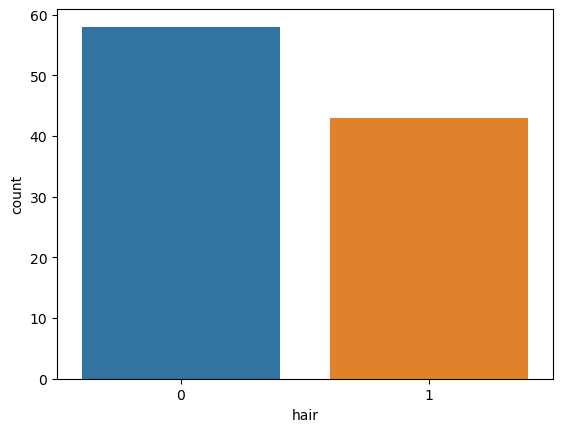

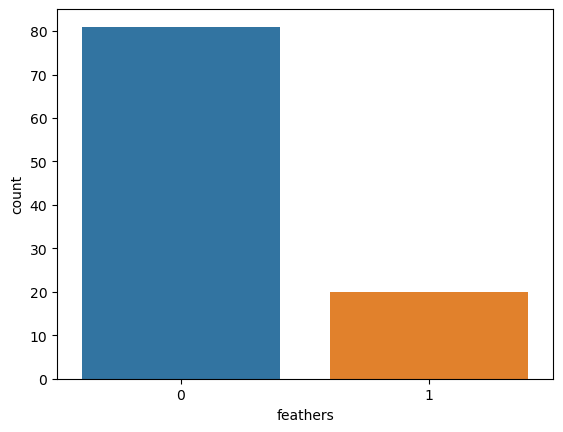

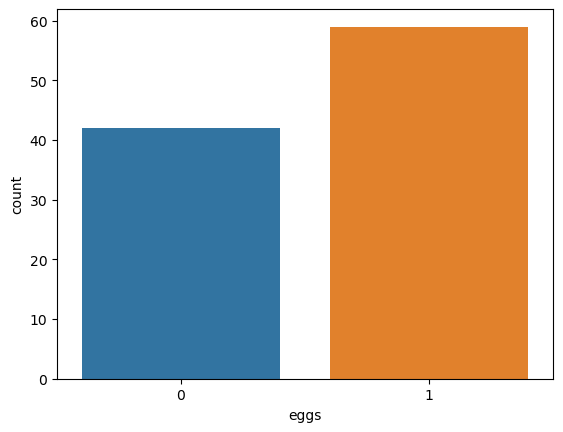

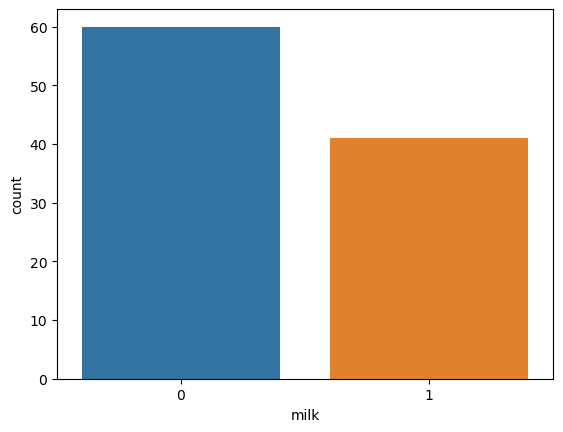

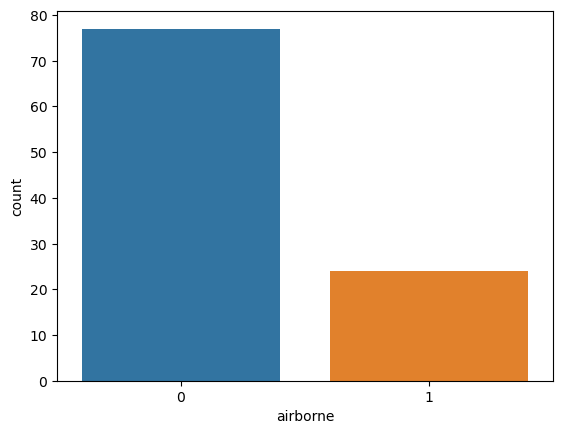

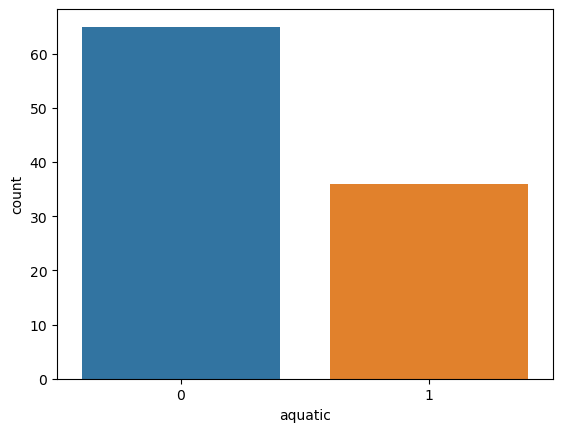

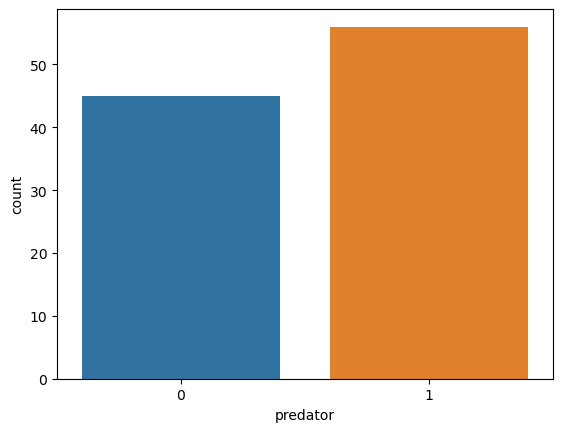

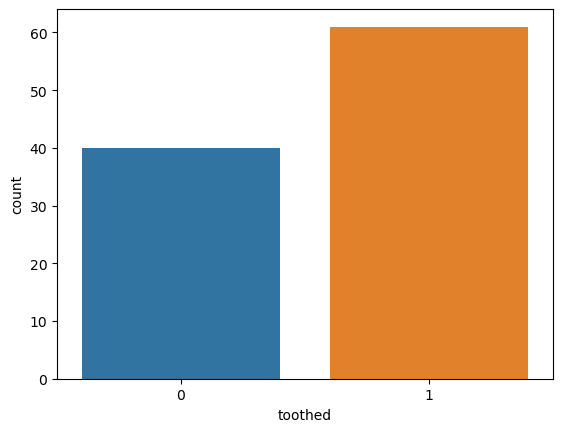

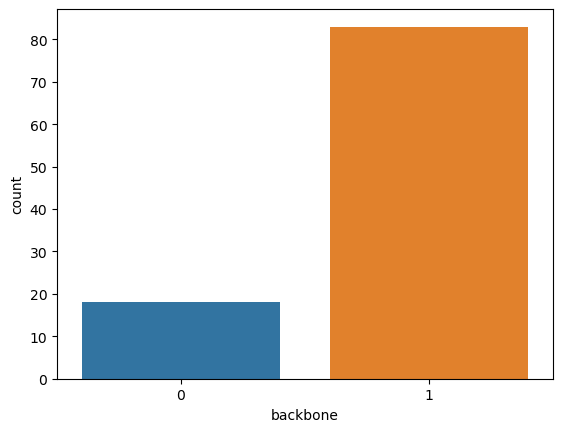

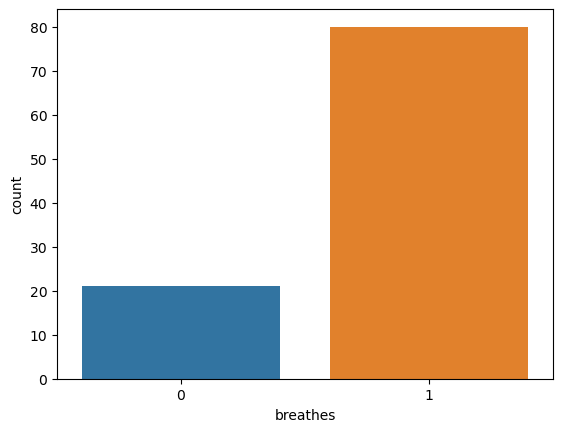

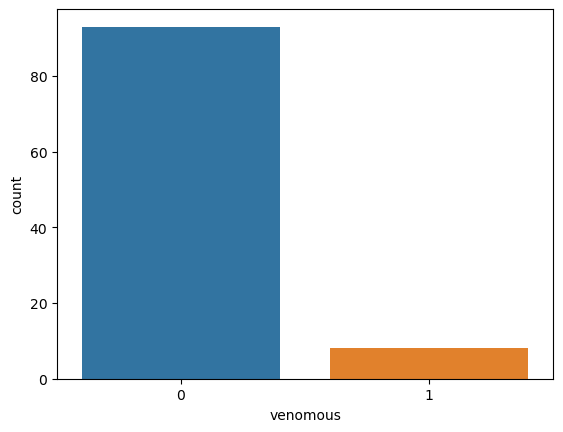

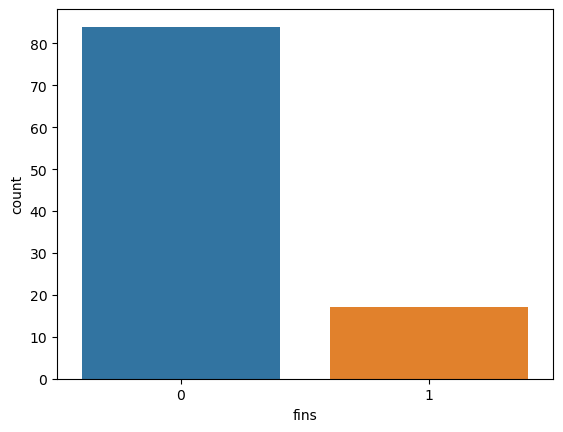

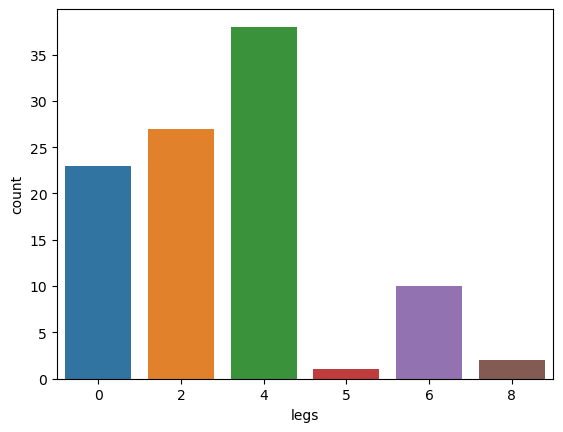

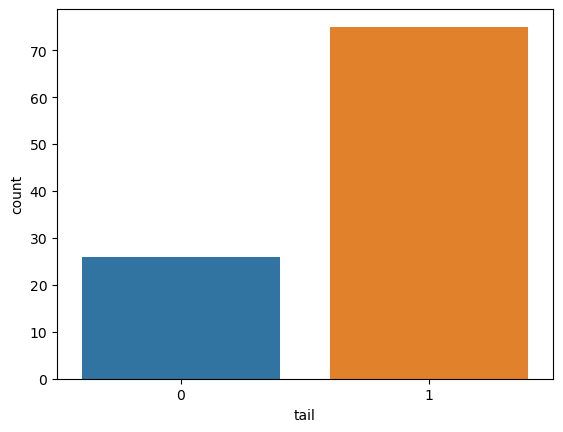

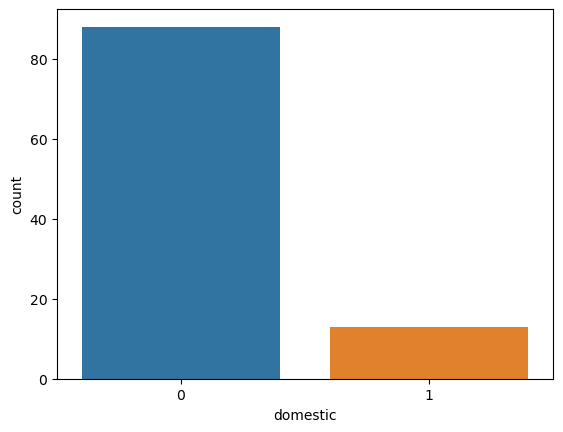

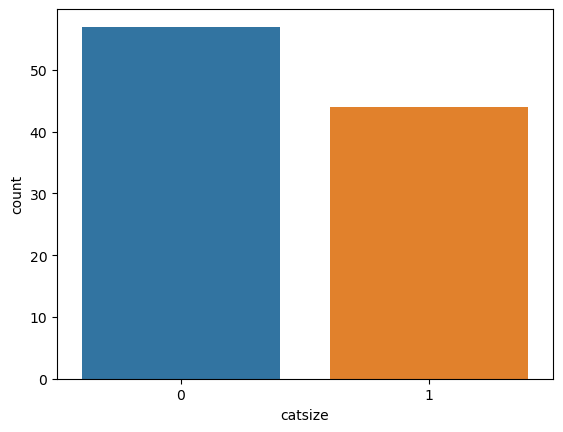

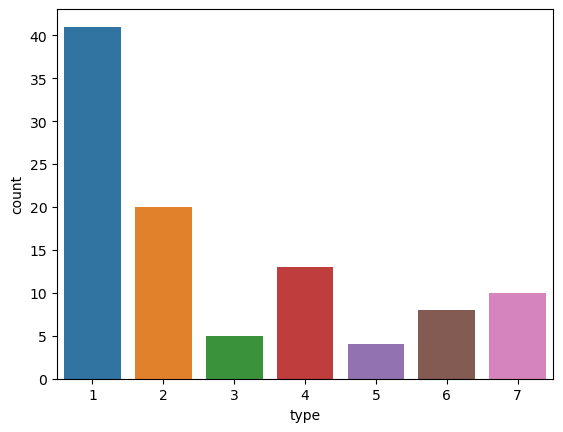

In [18]:
#multiple count Plot
for feature in features:
    sns.countplot(df,x=feature)
    plt.show()

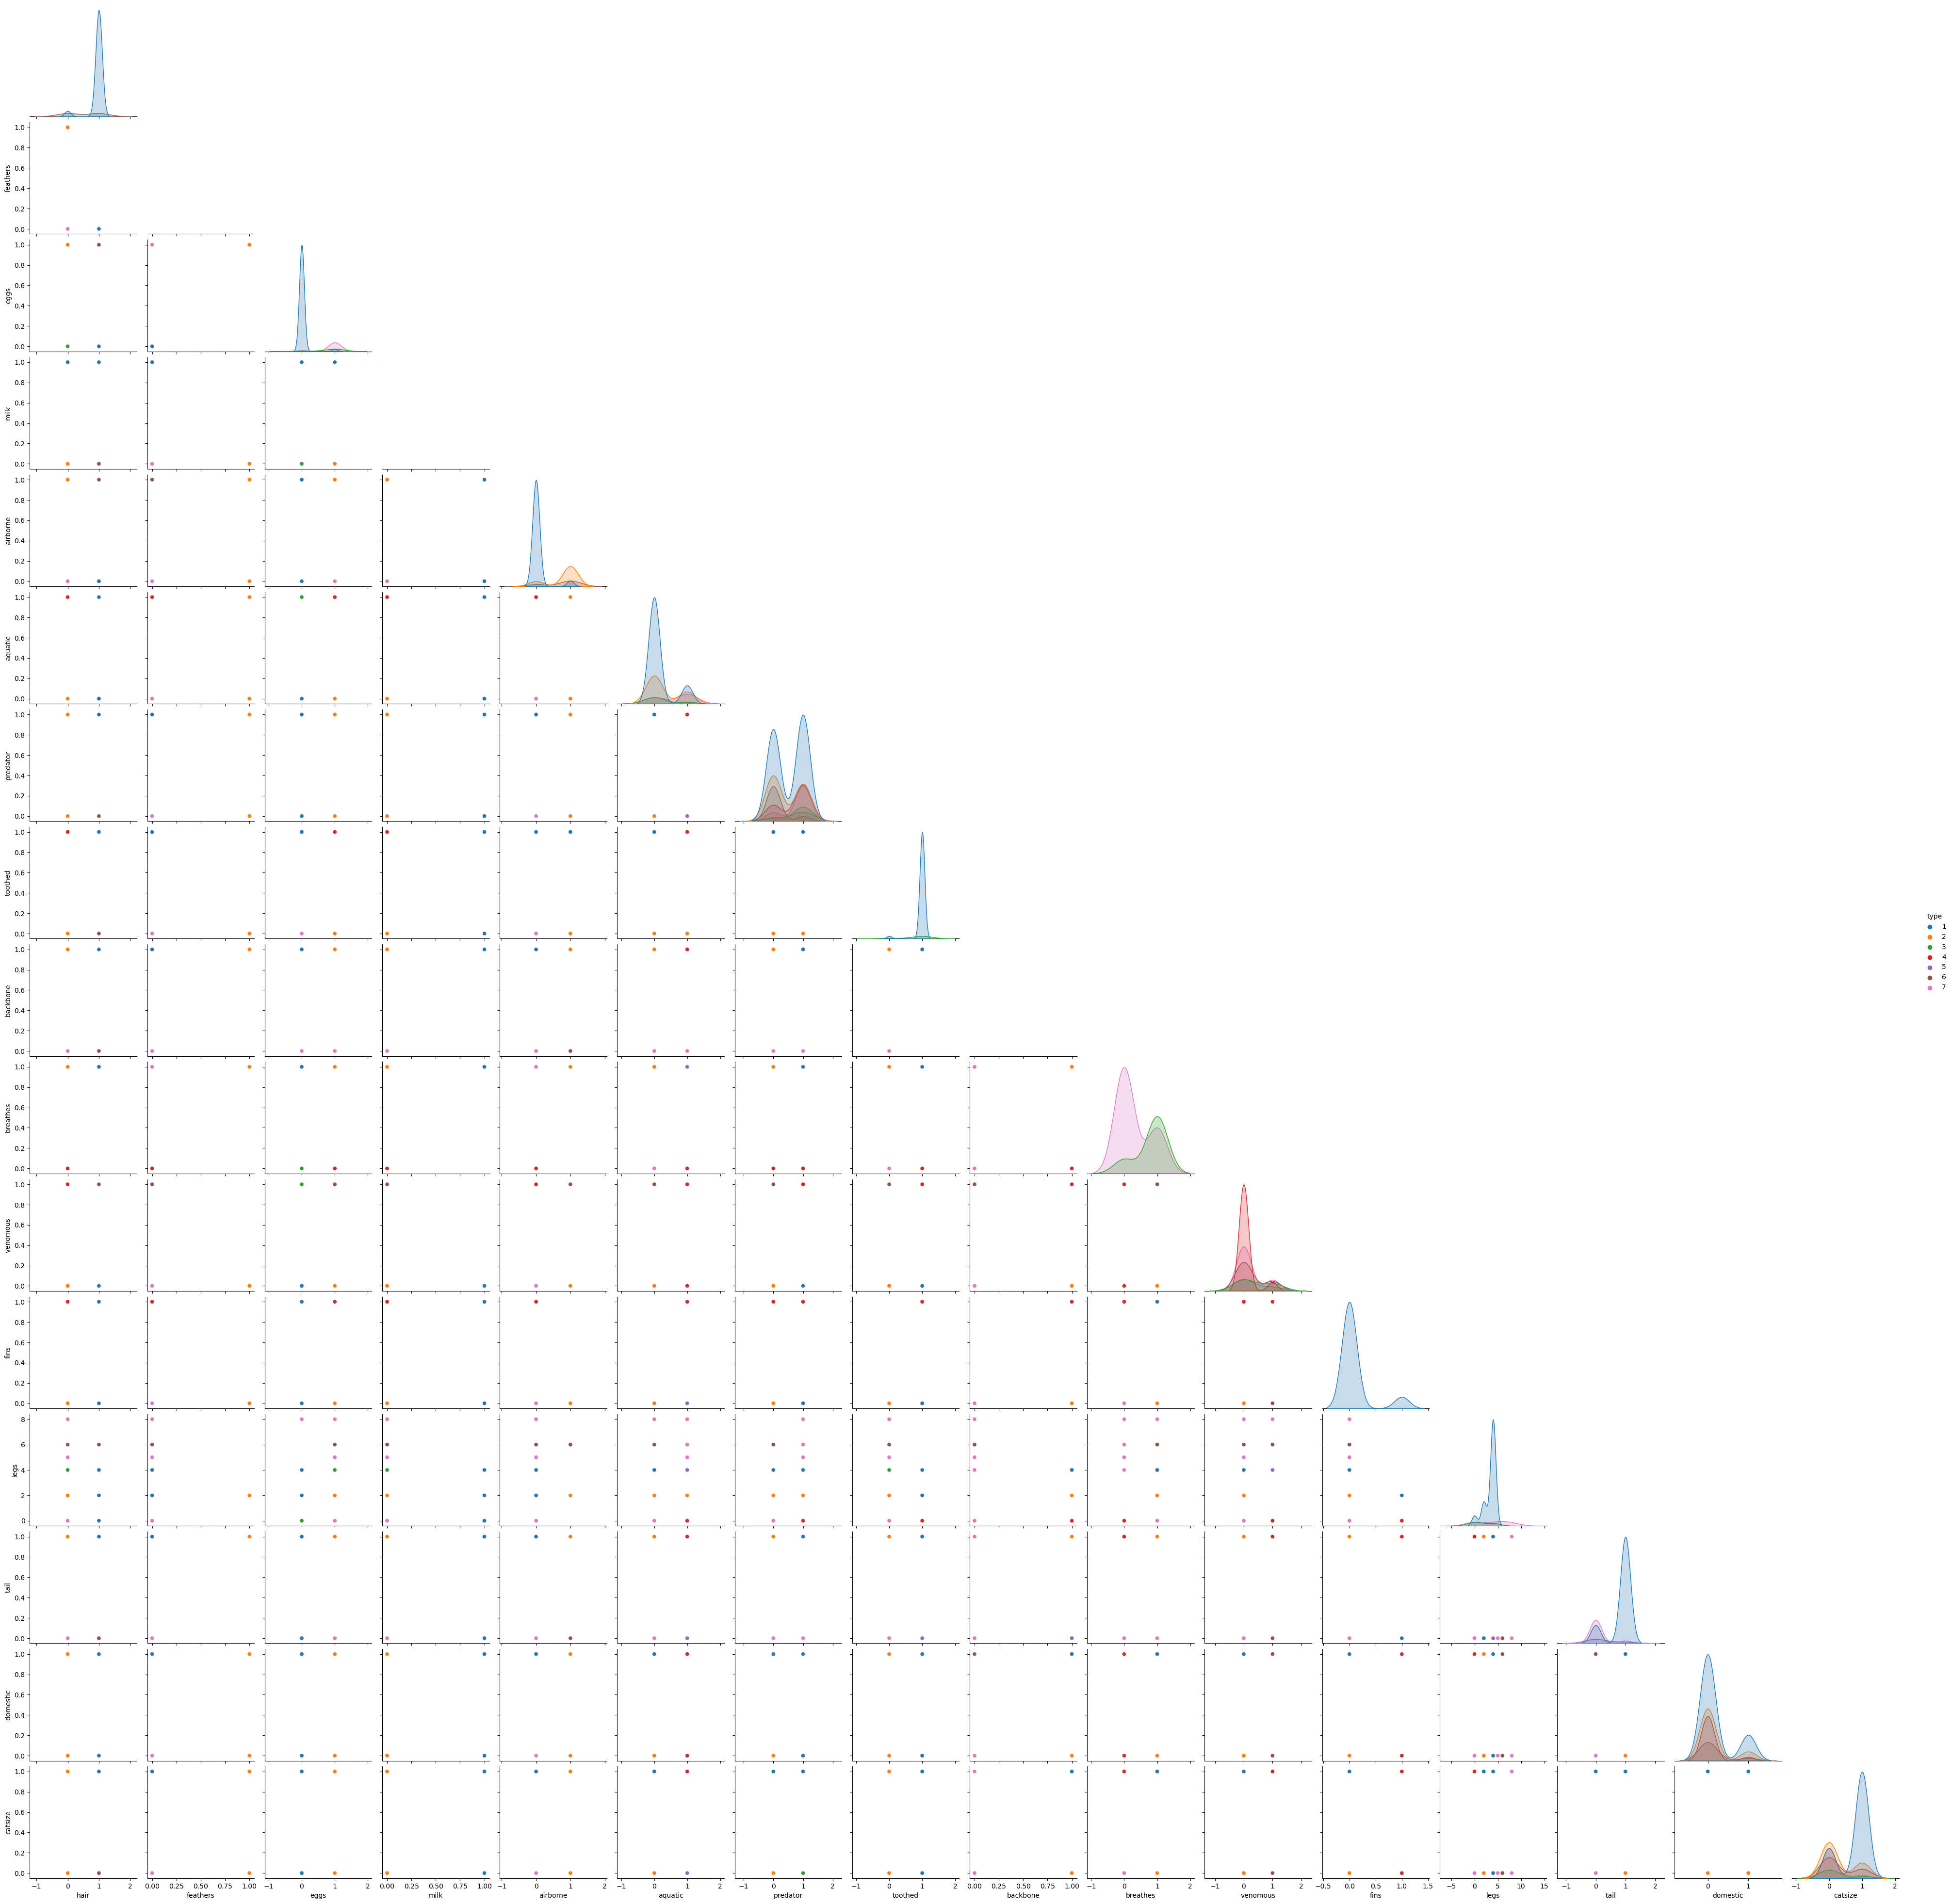

In [19]:
#pair plot
sns.pairplot(df,hue="type",corner=True)

In [20]:
#data preprocessing with min-max scaler

In [21]:
# lets split the into the input and target variable
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [22]:
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [23]:
y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: category
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7]

In [24]:
# Spliting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 2)

In [25]:
#transformation
trans1 = OneHotEncoder()

cat_columns= ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']

preproc = ColumnTransformer( 
                    transformers= [('Encoding', trans1, cat_columns)])

In [26]:
#KNN
knn = KNeighborsClassifier()

In [27]:
pipe = Pipeline(steps=[('Preprocessor',preproc)])

In [28]:
X_train = pipe.fit_transform(x_train)

In [29]:
X_train

array([[1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [30]:
X_test = pipe.transform(x_test)
X_test

array([[1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        1., 0., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        0., 1., 1., 0.],
       [1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
        0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        1., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
        1.,

In [31]:
#Perform KNN search

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [33]:
y_pred = knn.predict(X_test)

In [34]:
accu = accuracy_score(y_test,y_pred)
accu

1.0

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [36]:
#Grid Search CV
#Hyperparameter tuning

In [37]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

In [38]:
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

In [39]:
#Use GridSearch
clf = GridSearchCV(knn, hyperparameters, cv=4)

In [40]:
#Fit the model
Best_Model = clf.fit(X_train,y_train)

In [41]:
#Print The value of best Hyperparameters
print('Best leaf_size:', Best_Model.best_estimator_.get_params()['leaf_size'])
print('Best p:', Best_Model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', Best_Model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 1


In [42]:
# modelling using the optimized hyperparapmeters

In [43]:
knnOpt = KNeighborsClassifier(leaf_size= 1, n_neighbors= 1, p= 1)
knnOpt.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=1, n_neighbors=1, p=1)

In [44]:
y_predNew = knnOpt.predict(X_test)
print(classification_report(y_test, y_predNew))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [45]:
#as evident the Cross validated grid search with hyperparameter tuning in this case has no impact on the model accuracy